<p style="text-align:center; background-color:#f0f8ff; padding:20px; border:2px solid #4A90E2; border-radius:15px;">
  <span style="font-size:48px; color:#4A90E2; font-family:'Lucida Handwriting', cursive;">
    Heart Disease Detection using ML
  </span>
</p>
<p style="text-align:center; background-color:#f0f8ff; padding:10px; border:2px solid #4A90E2; border-radius:15px;">
  <span style="font-size:24px; color:#4A90E2; font-family:'Lucida Handwriting', cursive;">
    Fahim Alam
  </span>
</p>


<p style="padding:10px;background-color:#373A46 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💻</p>


<div style = 'border : 3px solid non; background-color:#f2f2f2
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


* **[1.Load and preprocess the data](#1)**

* **[2.Train a machine learning model](#2)**

* **[Evaluate the model](#3)**  
   
* **[4. Deploy the model using a web framework (such as Flask).](#4)**


   

In [1]:
import pandas as pd

# Load the heart disease dataset
heart_disease_df = pd.read_csv('heart_disease_df_1.csv')

# Display the first two rows of the DataFrame
heart_disease_df.head(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212.0,0,1.0,168,0,NaN,2,2,3,0
1,53,1,0.0,140,203.0,1,0.0,155,1,NaN,0,0,3,0


In [2]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1076 non-null   int64  
 1   sex       1076 non-null   int64  
 2   cp        1023 non-null   float64
 3   trestbps  1076 non-null   int64  
 4   chol      1021 non-null   float64
 5   fbs       1076 non-null   int64  
 6   restecg   1028 non-null   float64
 7   thalach   1076 non-null   int64  
 8   exang     1076 non-null   int64  
 9   oldpeak   0 non-null      float64
 10  slope     1076 non-null   int64  
 11  ca        1076 non-null   int64  
 12  thal      1076 non-null   int64  
 13  target    1076 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 117.8 KB


In [3]:
heart_disease_df['target'].value_counts(normalize = True)

target
1    0.512082
0    0.487918
Name: proportion, dtype: float64

In [4]:
heart_disease_df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1072,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1074,False,False,False,False,False,False,False,False,False,True,False,False,False,False


'oldpeak' contains null values.

In [5]:
heart_disease_df['oldpeak'].isnull().sum()

1076

In [6]:
heart_disease_df['chol'].isnull().sum()

55

**Dealing with null / empty values**

Deciding to drop values depends on EDA findings. For example, the oldpeak feature in our dataset refers to electrocardiogram measure. If we find that the oldpeak column has many missing values, we can drop it. If the target column has missing values, it is generally best to drop those rows, or treat them as a separate category.

In [7]:
column_dropped = heart_disease_df.drop(['oldpeak'], axis = 'columns')
rows_and_columns_dropped = column_dropped.dropna(how='all')

**Imputation**

Often, we have rows or columns with just a few missing values. We wouldn't want to drop an entire patient record just because they forgot to record their age. We also cannot drop columns like the target, as they are essential to prediction. One common technique used here is imputation. Imputation involves filling missing values with substitutes. Choosing an imputation strategy depends on the data. Sometimes it's best to fill with the mean or median. Other times, it makes sense to fill missing values with a constant, or the previous value in the dataset for timeseries. We can perform imputation using the pandas dot-fillna method. The inplace argument means that the operation directly modifies the original DataFrame. For instance, if we have missing values in the cholesterol column, we could fill them with the mean cholesterol level of all patients.

In [8]:
mean_value = heart_disease_df['chol'].mean() # mean cholestrol
mean_value

245.53770812928502

In [20]:
heart_disease_df['chol']= heart_disease_df['chol'].fillna(mean_value, inplace =  True)

In [10]:
heart_disease_df['chol'].isnull().sum()

0

**Advanced imputation**

Sometimes, using a summary statistic value for imputation does not capture the nuance required for successful modeling. In this case, we can use more complex ML techniques such as K-nearest neighbors or SMOTE to impute missing values if they can be predicted from features in the dataset. Here, we instantiate a KNN imputer object then use the fit_transform method on the column we want to impute values into.

In [11]:
from sklearn.impute import KNNImputer

In [12]:
def impute_missing_values(df):
    # Initialize the KNNImputer
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    df_imputed = imputer.fit_transform(df)
    return df_imputed

In [13]:
# Drop empty columns
heart_disease_column_dropped = heart_disease_df.drop(['oldpeak'], axis=1)

In [14]:
# Drop empty columns
heart_disease_column_dropped = heart_disease_df.drop(['oldpeak'], axis=1)

# Drop duplicate rows
heart_disease_duplicates_dropped = heart_disease_column_dropped.drop_duplicates()

In [15]:
# Calculate the mean value of the restecg column
mean_value = heart_disease_duplicates_dropped['restecg'].mean()

In [16]:
# Safely fill missing values in the 'restecg' column
heart_disease_df.loc[:, 'restecg'] = heart_disease_df['restecg'].fillna(mean_value)

# Verify if there are any NaN values left in 'restecg'
print(heart_disease_df['restecg'].isna().any())

# Display the first two rows of the DataFrame
heart_disease_df.head(2)

False


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212.0,0,1.0,168,0,NaN,2,2,3,0
1,53,1,0.0,140,203.0,1,0.0,155,1,NaN,0,0,3,0


Understanding the distribution of classes in our features - for example, patient sex - is a key part of EDA.


Class imbalance, where one class has significantly more samples than another, can potentially bias your model's training process, leading it to favor the majority class

In [17]:
print(heart_disease_df['sex'].value_counts())

sex
1    743
0    333
Name: count, dtype: int64


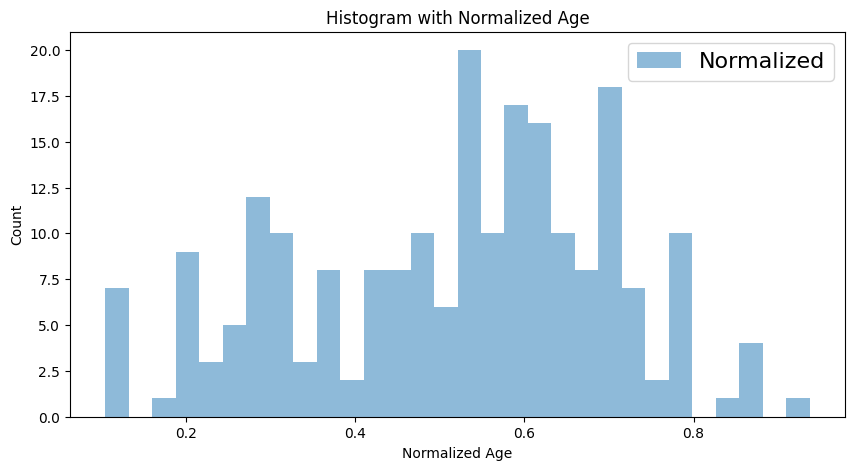

In [27]:
from sklearn.preprocessing import MinMaxScaler
# Normalize 'age' on the training set.
normalizer = MinMaxScaler()
X_train['age'] = normalizer.fit_transform(X_train['age'].values.reshape(-1,1))

# Use the same normalizer to transform the 'age' column of the test set to avoid data leakage
X_test['age'] = normalizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_test['age'], bins=30, alpha=0.5, label='Normalized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Normalized Age')
plt.xlabel('Normalized Age')
plt.ylabel('Count')
plt.show()

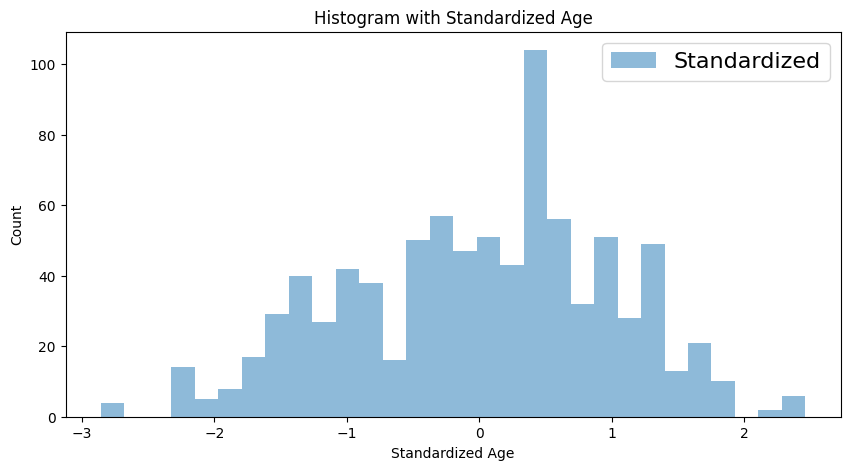

In [29]:
from sklearn.preprocessing import StandardScaler
# Standardize 'age' on the training set and use the same standardizer to transform the 'age' column of the test set to avoid data leakage
standardizer = StandardScaler()
X_train['age'] = standardizer.fit_transform(X_train['age'].values.reshape(-1,1))
X_test['age'] = standardizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_train['age'], bins=30, alpha=0.5, label='Standardized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Standardized Age')
plt.xlabel('Standardized Age')
plt.ylabel('Count')
plt.show()

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
heart_disease_df = pd.read_csv('heart_disease_cleaned_2.csv')

# Split the data into features and target
X = heart_disease_df.drop(columns=['target'])
y = heart_disease_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

<a id="3"></a>
<p style="padding:20px 40px; background-color:#4A90E2; margin:0; color:#ffffff; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:110%; text-align:center; border-radius: 20px 60px; overflow:hidden; font-weight:bold; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
Train a Machine Learning Model
</p>


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        50
           1       0.80      0.95      0.87        38

    accuracy                           0.88        88
   macro avg       0.88      0.88      0.87        88
weighted avg       0.89      0.88      0.88        88



We'll use the joblib library to save the trained model.

<a id="4"></a>
<p style="padding:20px 40px; background-color:#4A90E2; margin:0; color:#ffffff; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:110%; text-align:center; border-radius: 20px 60px; overflow:hidden; font-weight:bold; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
Deploy the Model Using Flask
</p>


**Requirements**
- Flask
- pandas
- scikit-learn
- joblib


The app looks like:

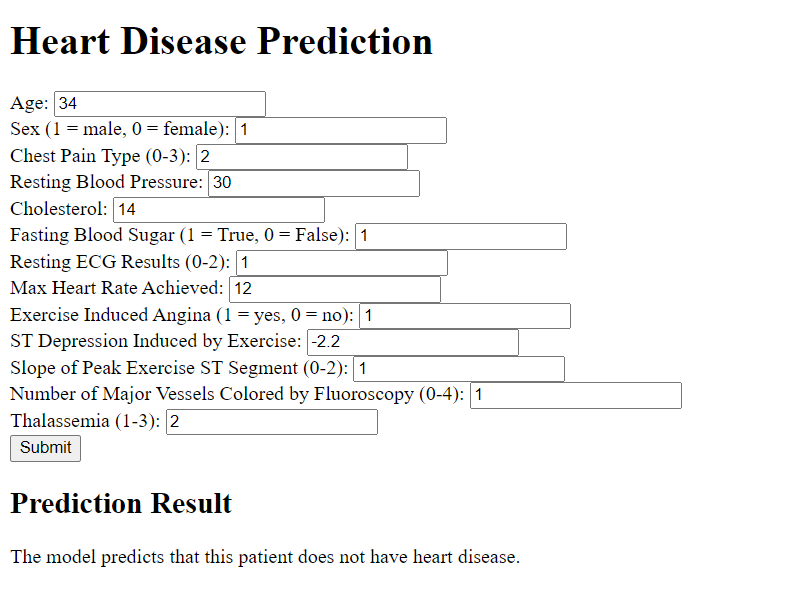